In [72]:
%pylab inline
import matplotlib.pyplot as plt
import numpy as np

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


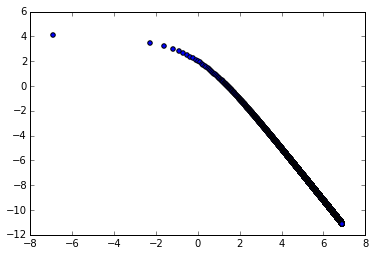

In [102]:
alph=0.1
bet=2
R_c=1
rho0=30
r=linspace(0.001,1000,10000)
def densities(alph,bet,R_c,rho0,r):
    rho=rho0/(((r/R_c)**alph)*((1+r/R_c)**bet))
    return (rho)
         
densdata=densities(alph,bet,R_c,rho0,r)
scatter(np.log(r),np.log(densdata))
    
    

In [103]:
def loglikelihood(y_obs, y_model):
    chi_squared = (1.0/2.0)*sum((y_obs-y_model)**2)
    return (-chi_squared)

In [104]:
densmodel=[]

alph_walk = empty((0))
bet_walk = empty((0))
R_c_walk = empty((0))
rho0_walk = empty((0))
logl_walk = empty((0))

alph0=0.03
bet0=3
R_c0=2
rho00=32

alph_walk = append(alph_walk, alph0)
bet_walk = append(bet_walk, bet0)
R_c_walk = append(R_c_walk, R_c0)
rho0_walk = append(rho0_walk, rho00)


densmodel = densities(alph_walk[0],bet_walk[0],R_c_walk[0],rho0_walk[0],r)
logl_walk = append(logl_walk, loglikelihood(densdata, densmodel))
print 'Los parámetros iniciales fueron'
print 'alph0='+str(alph_walk[0])
print 'bet0='+str(bet_walk[0])
print 'R_c0='+str(R_c_walk[0])
print 'rho00='+str(rho0_walk[0])

print 'El logaritmo de la función de likelihood es='+str(logl_walk[0])


Los parámetros iniciales fueron
alph0=0.03
bet0=3.0
R_c0=2.0
rho00=32.0
El logaritmo de la función de likelihood es=-231.42200222


In [111]:
n_iterations = 50000
densprime=[]
for i in range(n_iterations):
    alph0_prime = np.random.normal(alph_walk[i], 1) 
    bet0_prime = np.random.normal(bet_walk[i], 1) 
    R_c0_prime = np.random.normal(R_c_walk[i], 1) 
    rho00_prime = np.random.normal(rho0_walk[i], 1) 
    
    
    densmodel = densities(alph_walk[0],bet_walk[0],R_c_walk[0],rho0_walk[0],r)
    densprime = densities(alph0_prime,bet0_prime,R_c0_prime,rho00_prime,r)
    
    logl_prime = loglikelihood(densdata, densprime)
    logl_init = loglikelihood(densdata, densmodel)
    
    alpha = exp(logl_prime-logl_init)
    if(alpha>=1.0):
        alph_walk  = append(alph_walk,alph0_prime)
        bet_walk  = append(bet_walk,bet0_prime)
        R_c_walk  = append(R_c_walk,R_c0_prime)
        rho0_walk = append(rho0_walk,rho00_prime)
    
        logl_walk = append(logl_walk, logl_prime)
    else:
        beta = random.random()
        if(beta<=alpha):
            alph_walk  = append(alph_walk,alph0_prime)
            bet_walk  = append(bet_walk,bet0_prime)
            R_c_walk  = append(R_c_walk,R_c0_prime)
            rho0_walk = append(rho0_walk,rho00_prime)
         
            logl_walk = append(logl_walk, logl_prime)
        else:
            alph_walk  = append(alph_walk,alph_walk[i])
            bet_walk  = append(bet_walk,bet_walk[i])
            R_c_walk  = append(R_c_walk,R_c_walk[i])
            rho0_walk = append(rho0_walk,rho0_walk[i])
      
            logl_walk = append(logl_walk, logl_init)

/Users/Felipe/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:7: RuntimeWarning: invalid value encountered in power


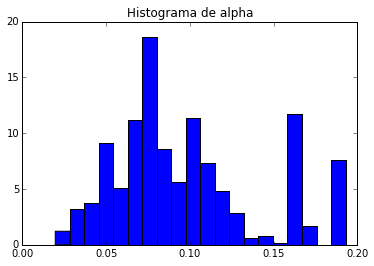

In [112]:
count, bins, ignored =plt.hist(alph_walk, 20, normed=True)
plt.title('Histograma de alpha', fontsize=12)

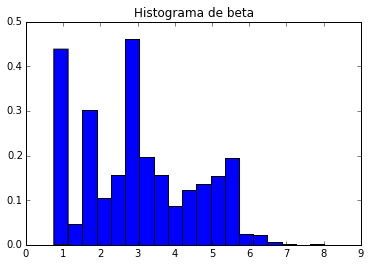

In [113]:
count, bins, ignored =plt.hist(bet_walk, 20, normed=True)
plt.title('Histograma de beta', fontsize=12)

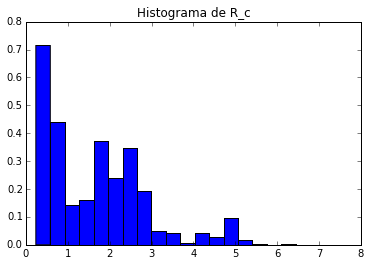

In [114]:
count, bins, ignored =plt.hist(R_c_walk, 20, normed=True)
plt.title('Histograma de R_c', fontsize=12)

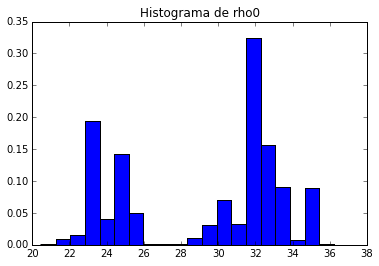

In [115]:
count, bins, ignored =plt.hist(rho0_walk, 20, normed=True)
plt.title('Histograma de rho0', fontsize=12)

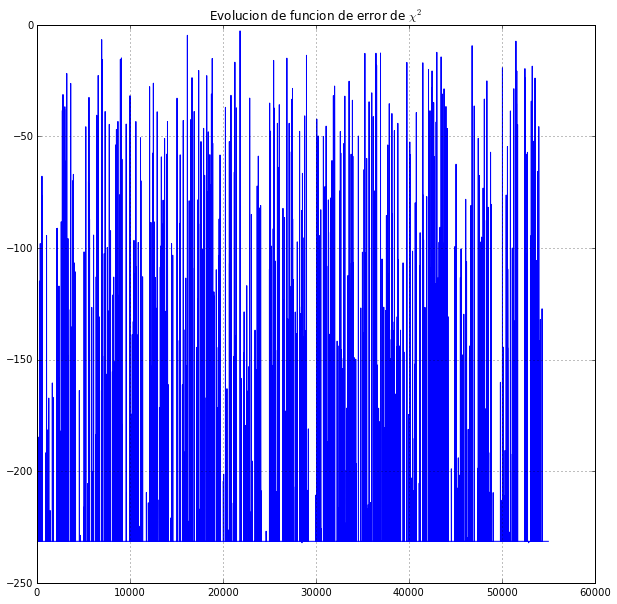

In [116]:
Plot2=plt.figure(figsize=(10,10))
plot((logl_walk))
plt.title('Evolucion de funcion de error de $\chi^{2}$', fontsize=12)
plt.grid()